In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df= pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [49]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
data=df.iloc[:,3:]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Annual Income vs Spending Score')

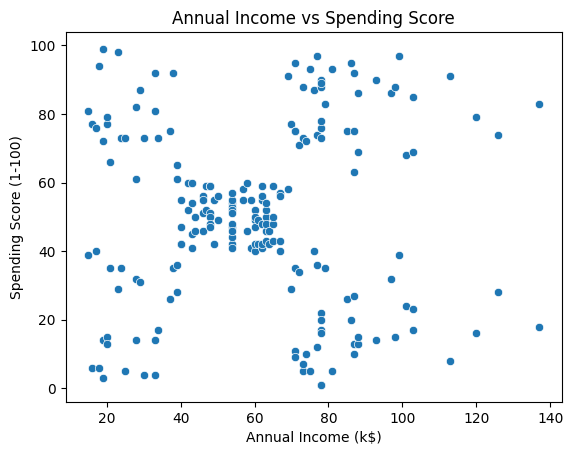

In [51]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title('Annual Income vs Spending Score')


In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=3).fit(data)
kmeans

KMeans(n_clusters=3)

In [54]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2])

In [55]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [57.55555556, 46.45185185],
       [88.97619048, 78.28571429]])

In [56]:
kmeans.inertia_

153105.01364159188

In [57]:
wcss=[]

In [58]:
for k in range (1,15):
 kmeans=KMeans(n_clusters=k)
 kmeans.fit(data)
 wcss.append(kmeans.inertia_)

In [59]:
wcss

[269981.28,
 181665.8231292517,
 106348.37306211119,
 73679.78903948837,
 44454.47647967974,
 37558.92202302528,
 32227.558007109168,
 31156.571564709804,
 23271.00160802555,
 22304.431508131507,
 17511.7418692661,
 16329.352195672545,
 15124.235412626593,
 13573.265434565435]

Text(0, 0.5, 'WCSS')

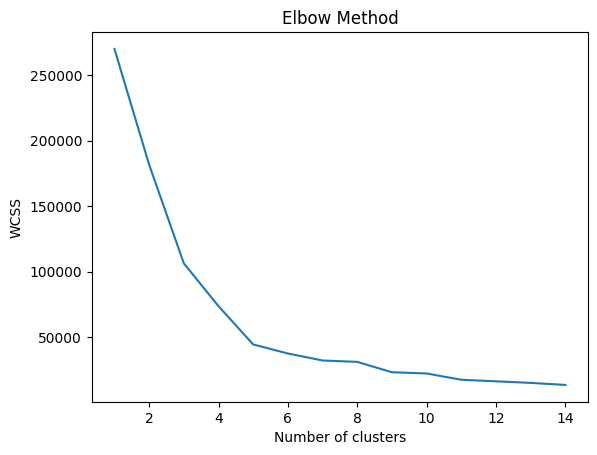

In [60]:
sns.lineplot(x = list(range(1,15)) , y = wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [61]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [62]:
labels = km.fit_predict(data)

In [63]:
labels

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [64]:
km.inertia_

44448.45544793371

In [65]:
centers=km.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

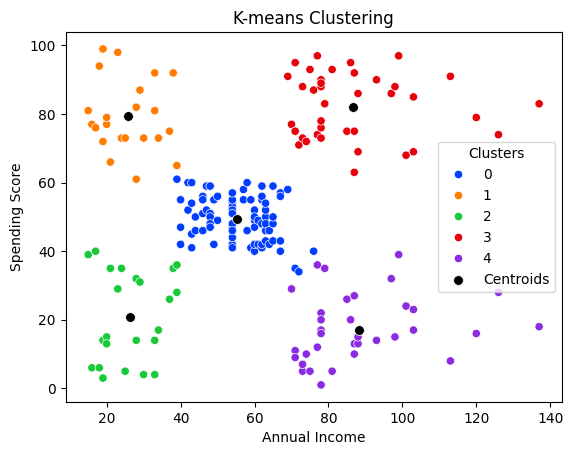

In [66]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",  hue=labels, palette='bright')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=50, color='black', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')
plt.show()

In [67]:
clustered_data = data.copy()
clustered_data['Cluster'] = labels
clustered_data

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,4
197,126,74,3
198,137,18,4


In [68]:
km.predict([[15,40]])

C:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [69]:
km.predict([[120,80]])

C:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
aglclustering = AgglomerativeClustering(n_clusters=5).fit(data)
aglclustering

AgglomerativeClustering(n_clusters=5)

In [72]:
aglabels=aglclustering.labels_
aglabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

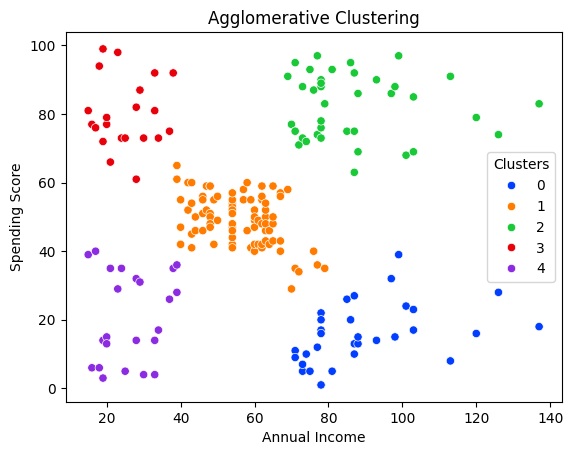

In [73]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=aglabels, palette='bright')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')


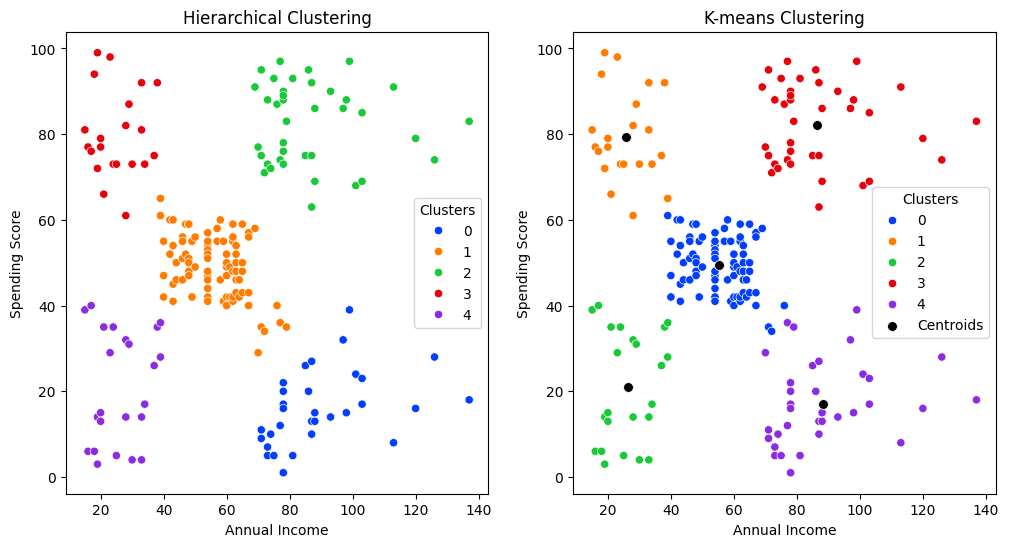

In [74]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=aglabels, palette='bright')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')

plt.subplot(1,2,2)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",  hue=labels, palette='bright')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=50, color='black', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')
plt.show()

In [75]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [76]:
Z = hierarchy.linkage(data, 'single')
plt.figure(figsize = (20,30))
dn = dendrogram(Z)

NameError: name 'hierarchy' is not defined